<a href="https://colab.research.google.com/github/gustavogrds/fenabrave_tcc/blob/main/Analise_de_dados_Licenciamentos_Autoveiculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_excel('SeriesTemporais_Autoveiculos.xlsm', header=4, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
df.head()

,Licenciamento Total,Licenciamento Nacionais,Licenciamento Importados,Produção,Exportação,Licenciamento Total.1,Licenciamento Nacionais.1,Licenciamento Importados.1,Produção.1,Exportação.1,Licenciamento Total.2,Licenciamento Nacionais.2,Licenciamento Importados.2,Produção.2,Exportação.2,Licenciamento Total.3,Licenciamento Nacionais.3,Licenciamento Importados.3,Produção.3,Exportação.3,Licenciamento Total.4,Licenciamento Nacionais.4,Licenciamento Importados.4,Produção.4,Exportação.4
1957-01-01,2009,2009,0,2317,0,758,758,0,1091,0,104,104,0,97,0,1037,1037,0,981,0,110,110,0,148,0
1957-02-01,2091,2091,0,2144,0,624,624,0,788,0,107,107,0,96,0,1262,1262,0,1103,0,98,98,0,157,0
1957-03-01,2802,2802,0,2660,0,817,817,0,1057,0,133,133,0,123,0,1706,1706,0,1290,0,146,146,0,190,0
1957-04-01,2530,2530,0,2449,0,722,722,0,890,0,105,105,0,118,0,1525,1525,0,1266,0,178,178,0,175,0
1957-05-01,2889,2889,0,2788,0,853,853,0,1012,0,147,147,0,141,0,1698,1698,0,1439,0,191,191,0,196,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 768 entries, 1957-01-01 to 2020-12-01
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Licenciamento Total         768 non-null    int64
 1   Licenciamento Nacionais     768 non-null    int64
 2   Licenciamento Importados    768 non-null    int64
 3   Produção                    768 non-null    int64
 4   Exportação                  768 non-null    int64
 5   Licenciamento Total.1       768 non-null    int64
 6   Licenciamento Nacionais.1   768 non-null    int64
 7   Licenciamento Importados.1  768 non-null    int64
 8   Produção.1                  768 non-null    int64
 9   Exportação.1                768 non-null    int64
 10  Licenciamento Total.2       768 non-null    int64
 11  Licenciamento Nacionais.2   768 non-null    int64
 12  Licenciamento Importados.2  768 non-null    int64
 13  Produção.2                  768 non-null    in

In [ ]:
df.describe()

,Licenciamento Total,Licenciamento Nacionais,Licenciamento Importados,Produção,Exportação,Licenciamento Total.1,Licenciamento Nacionais.1,Licenciamento Importados.1,Produção.1,Exportação.1,Licenciamento Total.2,Licenciamento Nacionais.2,Licenciamento Importados.2,Produção.2,Exportação.2,Licenciamento Total.3,Licenciamento Nacionais.3,Licenciamento Importados.3,Produção.3,Exportação.3,Licenciamento Total.4,Licenciamento Nacionais.4,Licenciamento Importados.4,Produção.4,Exportação.4
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,105974.121094,94275.466146,11698.654948,111076.371094,17022.985677,85754.518229,76429.856771,9324.661458,89067.462240,12931.660156,13931.658854,11671.053385,2260.605469,14650.220052,2938.498698,5268.007812,5167.208333,100.799479,6014.178385,833.093750,1019.936198,1007.347656,12.588542,1344.510417,319.733073
std,87840.945571,71376.512269,18311.440022,87544.323076,19027.968060,72815.768210,59468.314458,15390.237860,72442.075377,15676.398473,12174.399881,9278.723725,3183.849448,11524.487556,2735.765120,3028.989044,2949.337891,144.101655,3824.074902,896.143724,695.794041,690.668863,59.286259,1021.300528,326.456364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4296.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-72.000000,0.000000,0.000000
25%,41738.500000,41517.000000,0.000000,46415.500000,203.250000,32527.000000,32255.000000,0.000000,35586.250000,79.250000,4890.750000,4890.750000,0.000000,5215.000000,12.750000,3125.500000,3109.750000,0.000000,3282.250000,35.750000,447.750000,447.000000,0.000000,466.750000,13.750000
50%,76205.000000,74633.500000,0.000000,82717.500000,9636.500000,60263.000000,59696.000000,0.000000,62724.000000,5524.000000,9853.500000,9127.000000,0.000000,12390.000000,2887.500000,4588.500000,4518.000000,0.000000,5294.000000,572.000000,885.500000,881.000000,0.000000,1121.500000,243.000000
75%,151714.000000,133487.000000,20191.500000,170838.250000,27973.500000,125824.000000,112987.750000,13964.750000,140729.500000,21847.750000,19230.750000,14983.500000,4341.750000,20442.750000,5119.000000,6540.750000,6452.500000,187.500000,7529.500000,1233.250000,1422.750000,1395.750000,0.000000,1945.000000,535.500000
max,420080.000000,340910.000000,94235.000000,352328.000000,73432.000000,352014.000000,282609.000000,83046.000000,278924.000000,61586.000000,53464.000000,43990.000000,11760.000000,53521.000000,13557.000000,17478.000000,17007.000000,878.000000,22647.000000,4004.000000,3559.000000,3559.000000,604.000000,4644.000000,1443.000000


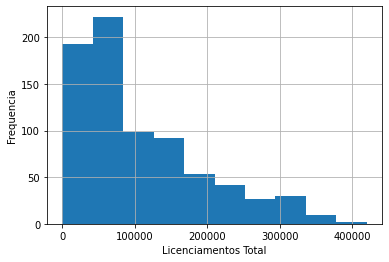

In [ ]:
df['Licenciamento Total'].hist()
plt.xlabel('Licenciamentos Total')
plt.ylabel('Frequencia')
plt.show()

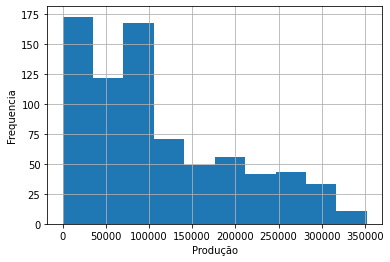

In [ ]:
df['Produção'].hist()
plt.xlabel('Produção')
plt.ylabel('Frequencia')
plt.show()

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Licenciamento Total,Licenciamento Nacionais,Licenciamento Importados,Produção,Exportação,Licenciamento Total.1,Licenciamento Nacionais.1,Licenciamento Importados.1,Produção.1,Exportação.1,Licenciamento Total.2,Licenciamento Nacionais.2,Licenciamento Importados.2,Produção.2,Exportação.2,Licenciamento Total.3,Licenciamento Nacionais.3,Licenciamento Importados.3,Produção.3,Exportação.3,Licenciamento Total.4,Licenciamento Nacionais.4,Licenciamento Importados.4,Produção.4,Exportação.4
Licenciamento Total,1.000000,0.994878,0.919100,0.967213,0.772400,0.999202,0.990516,0.900137,0.962131,0.760769,0.976162,0.971478,0.901459,0.949075,0.680181,0.851377,0.839773,0.708100,0.826641,0.741891,0.891510,0.891491,0.077290,0.858203,0.751827
Licenciamento Nacionais,0.994878,1.000000,0.874562,0.975340,0.791042,0.995564,0.998444,0.852289,0.972718,0.779389,0.962200,0.961463,0.877260,0.943563,0.694694,0.847519,0.836283,0.698424,0.827805,0.761000,0.886652,0.887656,0.064949,0.861763,0.770144
Licenciamento Importados,0.919100,0.874562,1.000000,0.837973,0.621827,0.912597,0.859703,0.995849,0.823816,0.611451,0.932120,0.912525,0.904858,0.874831,0.555001,0.780542,0.768672,0.674393,0.738725,0.592572,0.820522,0.816516,0.117596,0.757763,0.604595
Produção,0.967213,0.975340,0.837973,1.000000,0.859442,0.967870,0.974510,0.813743,0.998400,0.849674,0.935745,0.935007,0.853201,0.956029,0.744350,0.820197,0.807748,0.708163,0.856111,0.818941,0.874095,0.877283,0.038426,0.907251,0.806726
Exportação,0.772400,0.791042,0.621827,0.859442,1.000000,0.778346,0.800144,0.590806,0.866137,0.995280,0.729253,0.719191,0.692573,0.787352,0.854848,0.598119,0.582801,0.644125,0.684702,0.896813,0.693571,0.704453,-0.066818,0.785624,0.867574
Licenciamento Total.1,0.999202,0.995564,0.912597,0.967870,0.778346,1.000000,0.993222,0.893460,0.964478,0.767248,0.968379,0.963091,0.896140,0.942069,0.681768,0.841563,0.829517,0.711696,0.819048,0.747563,0.886108,0.885917,0.078823,0.855517,0.758372
Licenciamento Nacionais.1,0.990516,0.998444,0.859703,0.974510,0.800144,0.993222,1.000000,0.835196,0.974549,0.789020,0.950334,0.946990,0.874065,0.931807,0.699779,0.827827,0.815747,0.704820,0.811488,0.767007,0.874494,0.875090,0.068658,0.854510,0.779130
Licenciamento Importados.1,0.900137,0.852289,0.995849,0.813743,0.590806,0.893460,0.835196,1.000000,0.797547,0.581284,0.909568,0.897473,0.862491,0.856677,0.521680,0.782933,0.772622,0.643797,0.739547,0.573206,0.813367,0.810163,0.107641,0.745854,0.577501
Produção.1,0.962131,0.972718,0.823816,0.998400,0.866137,0.964478,0.974549,0.797547,1.000000,0.858450,0.924074,0.920824,0.849905,0.940455,0.739780,0.804456,0.791356,0.712772,0.839261,0.820460,0.860214,0.863517,0.035883,0.895436,0.809619
Exportação.1,0.760769,0.779389,0.611451,0.849674,0.995280,0.767248,0.789020,0.581284,0.858450,1.000000,0.712239,0.701219,0.679888,0.763004,0.802986,0.600272,0.585457,0.635010,0.684583,0.880878,0.674879,0.688162,-0.096402,0.768699,0.844167


In [ ]:
df2 = df.loc['2012-01-01':'2020-07-01']

In [ ]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,Licenciamento Total,Licenciamento Nacionais,Licenciamento Importados,Produção,Exportação,Licenciamento Total.1,Licenciamento Nacionais.1,Licenciamento Importados.1,Produção.1,Exportação.1,Licenciamento Total.2,Licenciamento Nacionais.2,Licenciamento Importados.2,Produção.2,Exportação.2,Licenciamento Total.3,Licenciamento Nacionais.3,Licenciamento Importados.3,Produção.3,Exportação.3,Licenciamento Total.4,Licenciamento Nacionais.4,Licenciamento Importados.4,Produção.4,Exportação.4
Licenciamento Total,1.000000,0.988758,0.906321,0.790838,-0.046098,0.997583,0.972539,0.873726,0.766608,-0.040323,0.963758,0.954068,0.768465,0.806184,-0.132525,0.868817,0.871969,0.374492,0.709364,0.142351,0.855030,0.855014,-0.106921,0.645626,0.205009
Licenciamento Nacionais,0.988758,1.000000,0.832944,0.809394,-0.001627,0.988207,0.994309,0.791828,0.792396,0.004506,0.953415,0.932718,0.806003,0.798686,-0.092849,0.833608,0.837377,0.336275,0.701255,0.146506,0.820062,0.820060,-0.116504,0.636503,0.239343
Licenciamento Importados,0.906321,0.832944,1.000000,0.639183,-0.165998,0.898934,0.789006,0.995573,0.597555,-0.161959,0.872083,0.894717,0.565970,0.726236,-0.228029,0.859329,0.860342,0.435519,0.643290,0.112751,0.846593,0.846540,-0.066424,0.590412,0.082258
Produção,0.790838,0.809394,0.639183,1.000000,0.302433,0.786222,0.800664,0.607129,0.994304,0.312848,0.789112,0.782783,0.622597,0.913140,0.126846,0.652320,0.655202,0.265209,0.850560,0.412515,0.694961,0.694989,-0.129753,0.829268,0.297184
Exportação,-0.046098,-0.001627,-0.165998,0.302433,1.000000,-0.019557,0.041981,-0.162651,0.340486,0.993263,-0.107543,-0.100416,-0.110661,0.173521,0.828967,-0.257677,-0.256101,-0.188746,0.062429,0.753374,-0.194695,-0.194729,0.064964,0.083070,0.518144
Licenciamento Total.1,0.997583,0.988207,0.898934,0.786222,-0.019557,1.000000,0.978096,0.868212,0.766225,-0.015118,0.944984,0.936641,0.748727,0.790815,-0.106425,0.839575,0.842789,0.356682,0.684464,0.166028,0.828892,0.828872,-0.098626,0.628902,0.228907
Licenciamento Nacionais.1,0.972539,0.994309,0.789006,0.800664,0.041981,0.978096,1.000000,0.745910,0.791786,0.046906,0.918632,0.892745,0.801101,0.765581,-0.049382,0.782372,0.786208,0.306359,0.662443,0.164850,0.770554,0.770555,-0.112555,0.605822,0.272560
Licenciamento Importados.1,0.873726,0.791828,0.995573,0.607129,-0.162651,0.868212,0.745910,1.000000,0.564304,-0.160188,0.833922,0.868935,0.486112,0.705456,-0.222822,0.821452,0.822592,0.411011,0.611014,0.138284,0.815439,0.815372,-0.047275,0.568198,0.082726
Produção.1,0.766608,0.792396,0.597555,0.994304,0.340486,0.766225,0.791786,0.564304,1.000000,0.351956,0.752990,0.742761,0.611364,0.869072,0.158534,0.604477,0.607124,0.246499,0.809270,0.416698,0.650427,0.650460,-0.129430,0.795172,0.308087
Exportação.1,-0.040323,0.004506,-0.161959,0.312848,0.993263,-0.015118,0.046906,-0.160188,0.351956,1.000000,-0.098558,-0.093502,-0.095339,0.174049,0.762406,-0.242946,-0.241652,-0.172039,0.080484,0.730040,-0.179899,-0.179894,0.020579,0.088434,0.473324


In [ ]:
df4= df2.loc[:, ['Licenciamento Total.1','Licenciamento Total.2','Licenciamento Total.3','Licenciamento Total.4']]

No handles with labels found to put in legend.


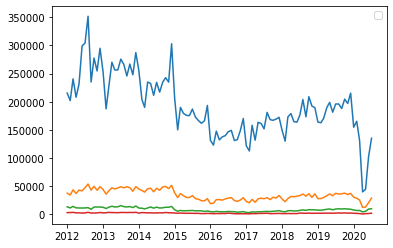

In [ ]:
plt.plot(df4)
pyplot.legend()


In [ ]:
df4.rename(columns={'Licenciamento Total.1':'Automóveis'}, inplace = True)
df4.rename(columns={'Licenciamento Total.2':'Comerciais Leves'}, inplace = True)
df4.rename(columns={'Licenciamento Total.3':'Caminhões'}, inplace = True)
df4.rename(columns={'Licenciamento Total.4':'Ônibus'}, inplace = True)


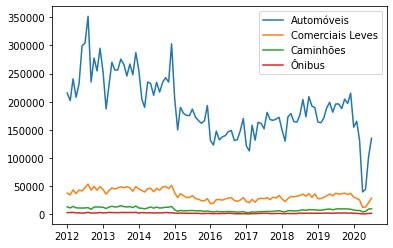

In [ ]:
plt.plot(df4)
plt.legend(['Automóveis','Comerciais Leves','Caminhões','Ônibus'])

In [ ]:
df4.describe()

,Automóveis,Comerciais Leves,Caminhões,Ônibus
count,103.000000,103.000000,103.000000,103.000000
mean,191793.776699,34053.475728,8055.339806,1670.349515
std,53734.570715,9202.699103,3340.121665,724.187627
min,39501.000000,11962.000000,2614.000000,320.000000
25%,161411.500000,27446.500000,4936.000000,1052.000000
50%,186884.000000,32749.000000,7601.000000,1568.000000
75%,231958.500000,42200.000000,10901.500000,2191.500000
max,352014.000000,53464.000000,15144.000000,3185.000000


In [ ]:
df2.describe()

,Licenciamento Total,Licenciamento Nacionais,Licenciamento Importados,Produção,Exportação,Licenciamento Total.1,Licenciamento Nacionais.1,Licenciamento Importados.1,Produção.1,Exportação.1,Licenciamento Total.2,Licenciamento Nacionais.2,Licenciamento Importados.2,Produção.2,Exportação.2,Licenciamento Total.3,Licenciamento Nacionais.3,Licenciamento Importados.3,Produção.3,Exportação.3,Licenciamento Total.4,Licenciamento Nacionais.4,Licenciamento Importados.4,Produção.4,Exportação.4
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,235572.941748,199003.339806,36569.601942,236288.504854,41245.077670,191793.776699,163424.533981,28369.242718,193374.805825,32877.728155,34053.475728,26067.446602,7986.029126,31497.038835,5950.077670,8055.339806,7841.271845,214.067961,9111.902913,1747.660194,1670.349515,1670.087379,0.262136,2304.757282,669.611650
std,65995.032768,50399.199784,17833.010224,59469.864256,14665.126086,53734.570715,40031.391798,16793.165189,47073.014632,12228.179395,9202.699103,7776.185726,1887.088610,9471.652135,2363.091609,3340.121665,3282.493395,106.069554,3856.771340,587.686984,724.187627,724.286750,0.685439,887.076201,227.070268
min,55735.000000,47368.000000,8367.000000,1847.000000,3870.000000,39501.000000,35847.000000,3654.000000,946.000000,2016.000000,11962.000000,7402.000000,4263.000000,102.000000,952.000000,2614.000000,2505.000000,88.000000,403.000000,217.000000,320.000000,320.000000,0.000000,396.000000,70.000000
25%,194206.500000,167976.000000,22266.000000,201453.000000,31651.500000,161411.500000,142325.000000,14938.500000,165869.500000,24600.500000,27446.500000,20551.000000,6312.500000,24768.000000,4460.500000,4936.000000,4791.000000,138.500000,5963.000000,1335.000000,1052.000000,1052.000000,0.000000,1635.500000,524.500000
50%,227617.000000,190471.000000,28242.000000,237390.000000,39449.000000,186884.000000,157329.000000,18783.000000,191832.000000,31288.000000,32749.000000,23884.000000,8189.000000,30434.000000,5856.000000,7601.000000,7366.000000,184.000000,8406.000000,1731.000000,1568.000000,1568.000000,0.000000,2276.000000,649.000000
75%,287786.500000,233435.000000,52497.500000,274250.500000,48945.500000,231958.500000,189640.000000,42682.000000,224353.000000,39836.000000,42200.000000,33384.500000,9451.500000,37986.000000,7331.000000,10901.500000,10601.000000,256.500000,11782.000000,2190.000000,2191.500000,2191.000000,0.000000,2902.000000,845.000000
max,420080.000000,340910.000000,79170.000000,352328.000000,73432.000000,352014.000000,282609.000000,69405.000000,278924.000000,61586.000000,53464.000000,43990.000000,11760.000000,53521.000000,13557.000000,15144.000000,14837.000000,673.000000,19059.000000,3002.000000,3185.000000,3185.000000,4.000000,4219.000000,1207.000000


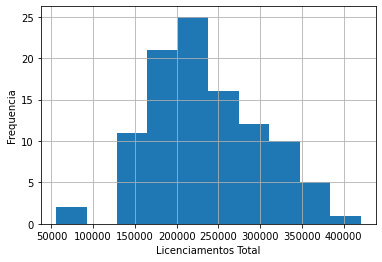

In [ ]:
df2['Licenciamento Total'].hist()
plt.xlabel('Licenciamentos Total')
plt.ylabel('Frequencia')
plt.show()

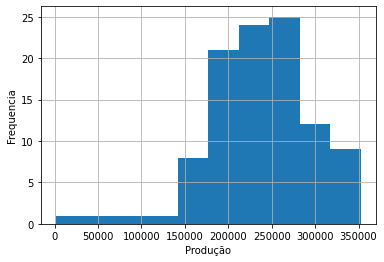

In [ ]:
df2['Produção'].hist()
plt.xlabel('Produção')
plt.ylabel('Frequencia')
plt.show()

In [ ]:
df3 = df.loc['2012-01-01':'2020-07-01',['Produção']]

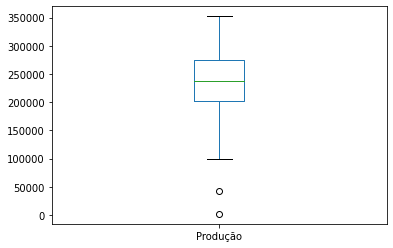

In [ ]:
df3.plot.box()

In [ ]:
df1 = df.loc['2012-01-01':'2020-07-01',['Licenciamento Total']]

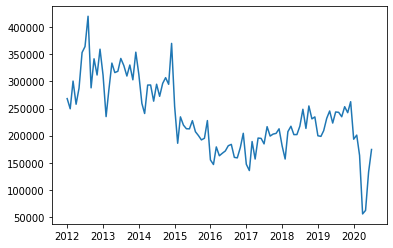

In [ ]:
plt.plot(df1)

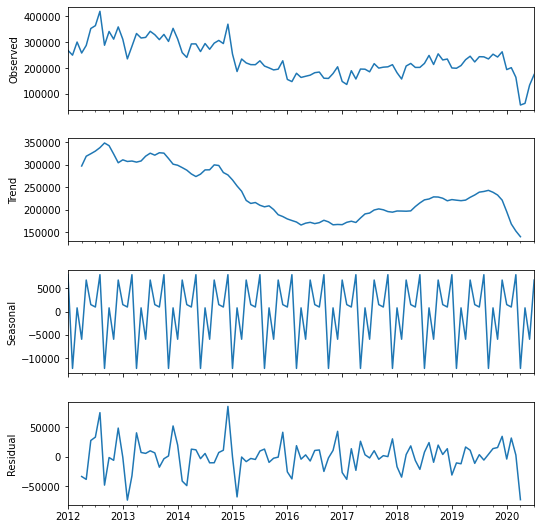

In [ ]:

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1)

res = sm.tsa.seasonal_decompose(df1,freq=7)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(8)
plt.show()

In [ ]:
df1.describe()

,Licenciamento Total
count,103.000000
mean,235572.941748
std,65995.032768
min,55735.000000
25%,194206.500000
50%,227617.000000
75%,287786.500000
max,420080.000000


In [ ]:
df1

,Licenciamento Total
2012-01-01,268273
2012-02-01,249517
2012-03-01,300574
2012-04-01,257887
2012-05-01,287465
...,...
2020-03-01,163625
2020-04-01,55735
2020-05-01,62190
2020-06-01,132818


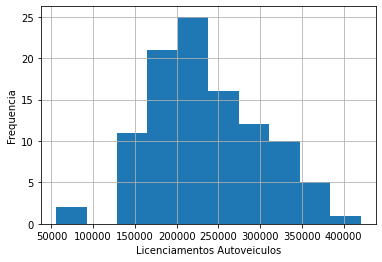

In [ ]:
df1['Licenciamento Total'].hist()
plt.xlabel('Licenciamentos Autoveiculos')
plt.ylabel('Frequencia')
plt.show()

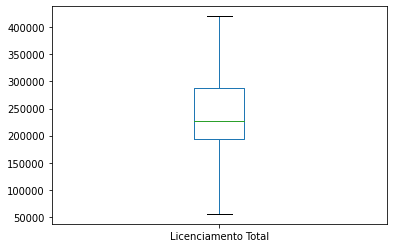

In [ ]:
df1.plot.box()

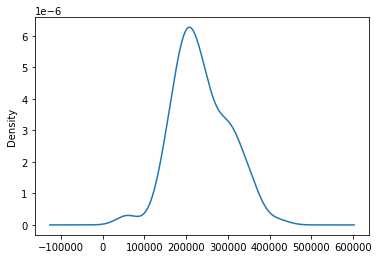

In [ ]:
df1['Licenciamento Total'].plot.kde()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103 entries, 2012-01-01 to 2020-07-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Licenciamento Total  103 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [ ]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

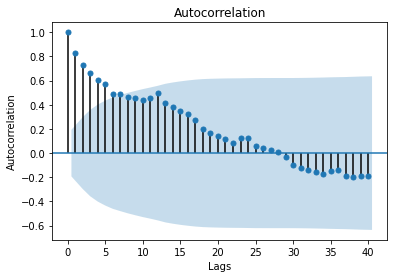

In [ ]:
plot_acf(df1, lags=40)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
pyplot.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [ ]:
model = ARIMA(np.asarray(df1), order=(1,1,3))

In [ ]:
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  102
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -1213.571
Method:                       css-mle   S.D. of innovations          35491.780
Date:                Thu, 26 Nov 2020   AIC                           2439.142
Time:                        18:29:28   BIC                           2454.892
Sample:                             1   HQIC                          2445.520
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1344.0847   1560.216     -0.861      0.391   -4402.052    1713.882
ar.L1.D.y     -0.7298      0.270     -2.698      0.008      -1.260      -0.200
ma.L1.D.y      0.3713      0.282      1.317      0.1

In [ ]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

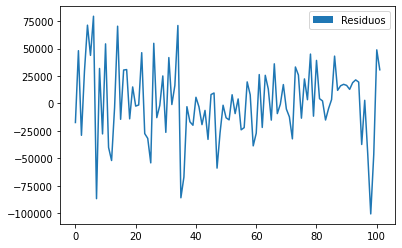

In [ ]:
residuals.plot()
legenda = mpatches.Patch(label='Residuos')
plt.legend(handles=[legenda])
pyplot.show()


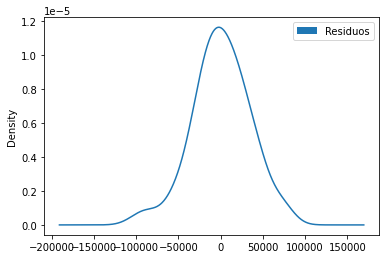

In [ ]:
residuals.plot(kind='kde')
legenda = mpatches.Patch(label='Residuos')
plt.legend(handles=[legenda])
pyplot.show()


In [ ]:
print(residuals.describe())

                   0
count     102.000000
mean      752.785972
std     34131.392400
min   -100628.269894
25%    -18801.572211
50%      -810.280278
75%     22153.268840
max     79476.990513


In [ ]:
X = df1.values
X = X.astype('float32')

In [ ]:
size = int(len(X) * 0.50)

In [ ]:
train = X[0:size]
test =  X[size:]

In [ ]:
history = [x for x in train]

In [ ]:
predictions = list()

In [ ]:
def difference(dataset, interval=1):
  diff = list() 
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [ ]:
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)
  
  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(0,0,1))
  
  # treina o modelo ARIMA
  model_fit = model.fit(trend='nc', disp=0)
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

Valor predito=191592.531, Valor esperado=162939
Valor predito=193771.750, Valor esperado=167489
Valor predito=195077.750, Valor esperado=171797
Valor predito=212095.172, Valor esperado=181408
Valor predito=186696.578, Valor esperado=183890
Valor predito=198203.125, Valor esperado=159961
Valor predito=166597.844, Valor esperado=159037
Valor predito=190178.656, Valor esperado=178156
Valor predito=219731.859, Valor esperado=204329
Valor predito=144977.672, Valor esperado=147219
Valor predito=148316.406, Valor esperado=135667
Valor predito=170704.125, Valor esperado=189149
Valor predito=175321.516, Valor esperado=156894
Valor predito=155215.547, Valor esperado=195562
Valor predito=198173.641, Valor esperado=194954
Valor predito=179334.797, Valor esperado=184815
Valor predito=187449.656, Valor esperado=216534
Valor predito=179104.156, Valor esperado=199211
Valor predito=172394.109, Valor esperado=202857
Valor predito=198459.938, Valor esperado=204205
Valor predito=208159.719, Valor esperado

In [ ]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 34255.918


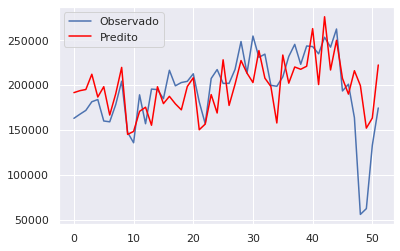

In [ ]:
pyplot.plot(test, label= 'Observado')
pyplot.plot(predictions, color='red', label= 'Predito')
pyplot.legend()
pyplot.show()

In [ ]:
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [ ]:
residuals = pd.DataFrame(residuals)

In [ ]:
residuals.head()

,0
0,-28653.531250
1,-26282.750000
2,-23280.750000
3,-30687.171875
4,-2806.578125


In [ ]:
residuals.describe()

,0
count,52.000000
mean,-1821.226562
std,34541.213635
min,-143717.296875
25%,-20725.546875
50%,1783.148438
75%,23099.609375
max,51907.765625


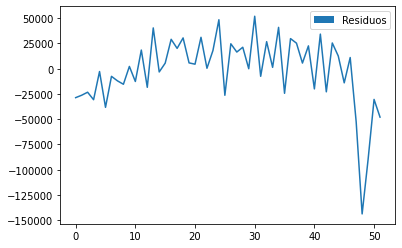

In [ ]:
residuals.plot()
legenda = mpatches.Patch(label='Residuos')
plt.legend(handles=[legenda])
pyplot.show()



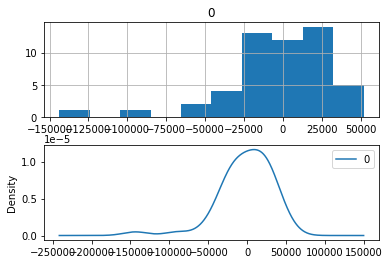

In [ ]:
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())

pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

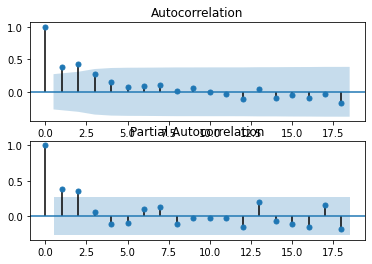

In [ ]:
pyplot.figure() 
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

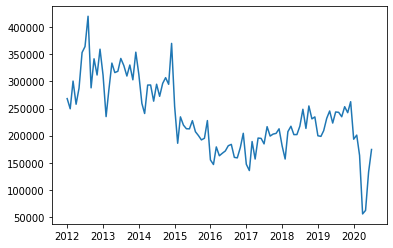

In [ ]:
plt.plot(df1)

In [ ]:
from numpy import log
X = df1.values
X = log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=12.496070, mean2=12.151849
variance1=0.057074, variance2=0.081848


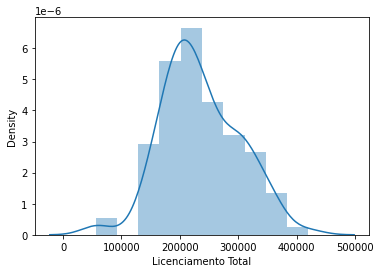

In [ ]:
sns.distplot(df1['Licenciamento Total'])

In [ ]:
print("Skewness: %f" % df1['Licenciamento Total'].skew())
print("Kurtosis: %f" % df1['Licenciamento Total'].kurt())

Skewness: 0.205998
Kurtosis: 0.160261


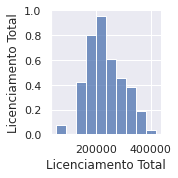

In [ ]:
sns.set()
cols = ['Licenciamento Total']
sns.pairplot(df1[cols], size = 2.5)
plt.show();

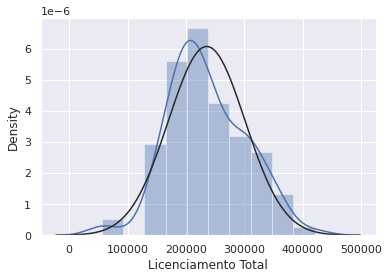

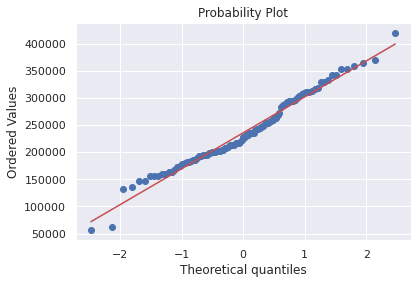

In [ ]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df1['Licenciamento Total'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['Licenciamento Total'], plot=plt)

In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

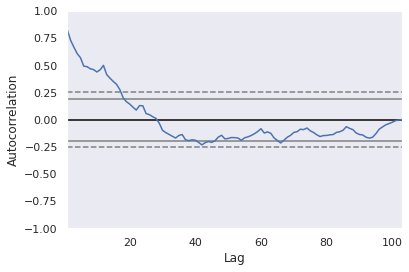

In [ ]:
# autocorrelation plot 
autocorrelation_plot(df1)
pyplot.show()

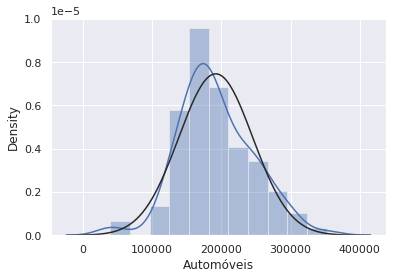

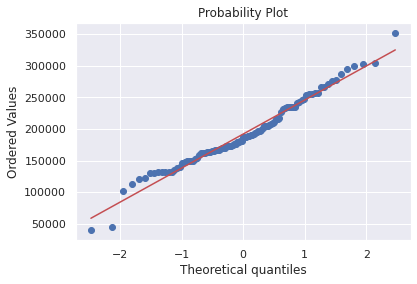

In [ ]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df4['Automóveis'], fit=norm);
fig = plt.figure()
res = stats.probplot(df4['Automóveis'], plot=plt)

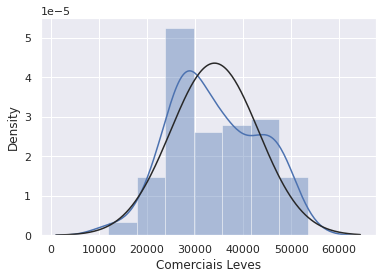

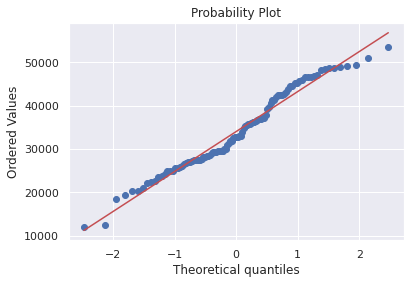

In [ ]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df4['Comerciais Leves'], fit=norm);
fig = plt.figure()
res = stats.probplot(df4['Comerciais Leves'], plot=plt)

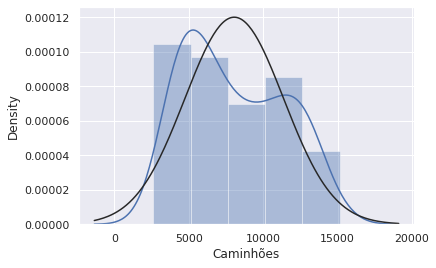

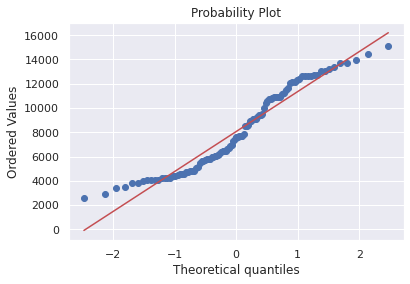

In [ ]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df4['Caminhões'], fit=norm);
fig = plt.figure()
res = stats.probplot(df4['Caminhões'], plot=plt)

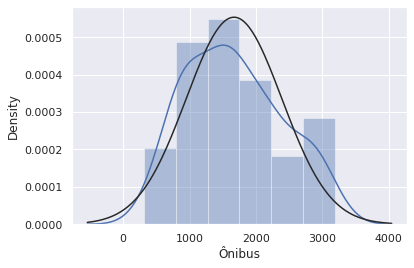

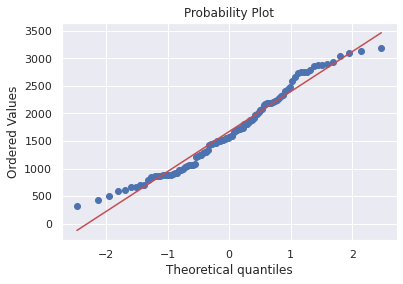

In [ ]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df4['Ônibus'], fit=norm);
fig = plt.figure()
res = stats.probplot(df4['Ônibus'], plot=plt)